In [1]:
import gensim
import pandas as pd
import pickle

In [2]:
filename='preprocessed_data.pkl'

In [3]:
data=pickle.load(open(filename,'rb')) ###open preprocessed data

In [4]:
len(data)

8450

In [5]:
data.head()

,Transcript,Class 1
0,shattered chiromo mortuary and positively iden...,0
1,heading game chicken end game inevitable it be...,0
2,know else shit tech industry nothing designed ...,0
3,laverokbirdfood bluefrogtoys peacockspro jjeve...,0
4,reposting please refrain sharing video suicide...,0


In [6]:
Y= data.iloc[:,1].values
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [7]:
###Manually resolve the tabbed data errors

index = [791,  792,  793,  830,  831,  832,  833,  839,  844, 846, 852,  853,
         855,  858,  860,  876,  882,  890,  892,  904,  909,  912,  936,
         938,  943,  945,  957,  964,  965,  967,  969,  972,  975,  976,
        1000, 1007, 1013, 1018, 1297] 
for i in index:
    Y[i] = 0  ###replace value of selected indices of AD column with 0

idx = [1072, 1101, 1184, 1244]
for i in idx:
    Y[i] = 1  ###replace value of selected indices of AD column with 1
Y = Y.astype(int)

In [12]:
import nltk
nltk.download()
from nltk.tokenize import word_tokenize

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [13]:
def create_tokens(data):   ###utility function to create tokens
    sent_tokens =[]
    word_tokens = []
    for i in range(0,len(data)):
        word_tokens.append(word_tokenize(data[i]))
        sent_tokens.append(word_tokens[i])
    return sent_tokens

In [14]:
X=data['Transcript'].tolist()

In [15]:
X=create_tokens(X)  ###created tokens in list of list format to convert words into vectors using gensim 
X

[['shattered',
  'chiromo',
  'mortuary',
  'and',
  'positively',
  'identified',
  'body',
  'abdalla',
  'and',
  'feisal',
  'two',
  'good'],
 ['heading',
  'game',
  'chicken',
  'end',
  'game',
  'inevitable',
  'it',
  'became',
  'apparent',
  'brexiters',
  'actua'],
 ['know',
  'else',
  'shit',
  'tech',
  'industry',
  'nothing',
  'designed',
  'multilinguals',
  'mind',
  'long',
  'w'],
 ['laverokbirdfood',
  'bluefrogtoys',
  'peacockspro',
  'jjeventbars',
  'gingerwebltd',
  'mine',
  'never',
  'liked',
  'rain',
  'it',
  'cha'],
 ['reposting',
  'please',
  'refrain',
  'sharing',
  'video',
  'suicide',
  'self',
  'harm',
  'it',
  'trigger',
  'u',
  'suffering',
  'mental',
  'illne'],
 ['time',
  'likely',
  'killed',
  'opioid',
  'death',
  'gun',
  'guess',
  'shoot',
  'hole',
  'take'],
 ['hate',
  'always',
  'present',
  'somebody',
  'else',
  'need',
  'help',
  'expect',
  'much',
  'also'],
 ['hotel',
  'terror',
  'attack',
  'surveillance',
  'f

In [16]:
from gensim.models import Word2Vec

In [17]:
word_vectors = Word2Vec(X, window=3, min_count = 1, size = 100, sg= 0) ##training the word2vec model on our transcript data 
                                                                       ##using CBOW model. Dimension of each token is 100
                                                                       ##CBOW is faster to train than Skip gram model

In [19]:
w1="harm"   ##similar words of harm in the dataset
word_vectors.wv.most_similar(w1)

[('stop', 0.9994338154792786),
 ('get', 0.9994220733642578),
 ('year', 0.99940025806427),
 ('watch', 0.9993999600410461),
 ('another', 0.9993991851806641),
 ('word', 0.9993879199028015),
 ('went', 0.9993871450424194),
 ('w', 0.9993864893913269),
 ('trying', 0.9993762373924255),
 ('two', 0.9993685483932495)]

In [20]:
word_vectors['cookie'] ##vector for a given word

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.03041522,  0.01177979,  0.00504857, -0.01532062, -0.01894731,
       -0.01835536, -0.00595179, -0.00582789, -0.03700542, -0.04981659,
       -0.0031342 , -0.01570419, -0.01550008,  0.0213805 , -0.02483644,
       -0.00456423, -0.01080073, -0.02316521, -0.03102024, -0.0042756 ,
        0.01744224,  0.02960012, -0.00543823, -0.00969417,  0.02126435,
        0.00833963, -0.01218591, -0.01831855,  0.031023  , -0.02073802,
        0.01442143,  0.02202068, -0.02066589,  0.03645595, -0.02387524,
        0.00022768,  0.00941509,  0.01092328,  0.01589857, -0.00438182,
       -0.00524335,  0.01486621,  0.00125934,  0.02872265,  0.00275553,
       -0.01178241,  0.04065509, -0.02234057, -0.03041544,  0.00699719,
        0.04750242, -0.00286868, -0.00654987,  0.01617867, -0.02065754,
       -0.00428772,  0.02057611,  0.00658278, -0.01616491,  0.00075864,
       -0.01665032, -0.01938919, -0.01925158, -0.02886348, -0.01615233,
       -0.03721502,  0.00749115, -0.00808531,  0.01141807,  0.02

In [21]:
word_vectors.wv.similarity("girl",'boy') ###similarity between girl and boy

0.99876595

In [22]:
word_vectors.wv.similar_by_word('kitchen')

[('weird', 0.985681414604187),
 ('easier', 0.9850888848304749),
 ('local', 0.9848207235336304),
 ('sep', 0.9848005771636963),
 ('gift', 0.984695315361023),
 ('film', 0.9846446514129639),
 ('discussion', 0.9846314191818237),
 ('survivor', 0.9846064448356628),
 ('okay', 0.9845873117446899),
 ('west', 0.9845467805862427)]

In [23]:
word_vectors.save('word_vectors.bin') ###save the word vectors for future use

In [24]:
len(word_vectors.wv.vocab) ##number of words in the vocabulary

9759

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def visualize_word_embeddings(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]


    close_words = model.similar_by_word(word)  ###get words similar to the desired words
    
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)  ###TSNE reduces the dimension from 100 to 2

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(5,5))
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00001, x_coords.max()+0.00001)
    plt.ylim(y_coords.min()+0.00001, y_coords.max()+0.00001)
    plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


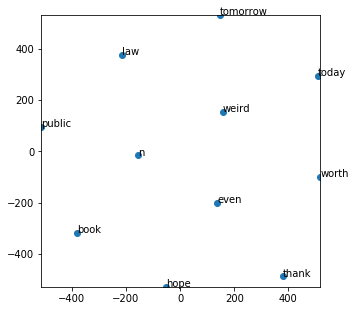

In [28]:
visualize_word_embeddings(word_vectors, 'weird') ###plot similar words to mother in the dataset

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


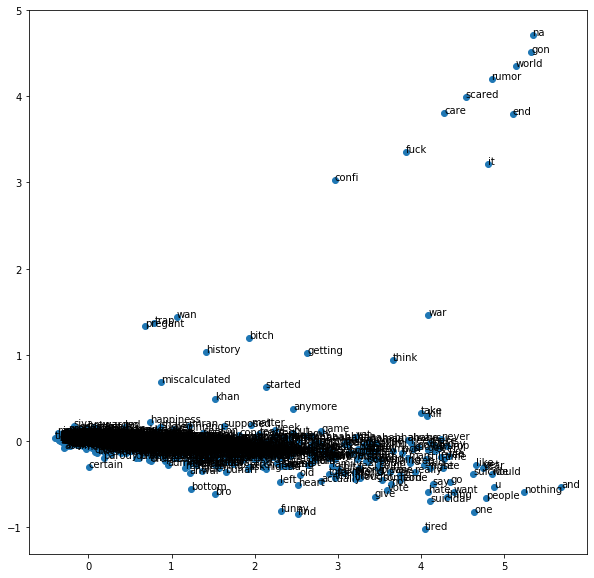

In [29]:
from sklearn.decomposition import PCA
plt.figure(figsize=(10,10))
X = word_vectors[word_vectors.wv.vocab]  ###plot all the words in the dataset
pca = PCA(n_components=2)   
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(word_vectors.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()    ###plot show that mostly words are similar in context and that's true as the transcripts are the description
              ###of the few selected scene. Hence, we can say that our trained word2vec model is working fine